In [1]:
# Importar librerias
import wfdb.plot
import wfdb.processing
import numpy as np
import wfdb
from wfdb import processing, rdrecord, rdann

# Cargar datos

El problema que tenemos al trabajar con la base de datos MIT-BIH es que se encuentra en un formato basado en 4 archivos. Para facilitar el trabajo, se identificarán los nombres de los archivos de la base de datos MIT-BIH y se creará una función que permita cargar los datos de manera más sencilla.

In [2]:
import os

def listar_archivos(carpeta):
    try:
        archivos = os.listdir(carpeta)
        archivos_correctos = []
        
        for archivo in archivos:
            if archivo.endswith('.atr'):
                archivos_correctos.append(f"{carpeta}{archivo.replace('.atr', '')}")
        return archivos_correctos
    except FileNotFoundError:
        print("La carpeta no existe")

In [3]:
carpeta = 'data/mit-bih-arrhythmia-database-1.0.0/'
nombre_archivos = listar_archivos(carpeta)

Una vez tenemos los nombres de los archivos, procedemos a calcular el ritmo cardiaco de cada uno de los registros.

In [4]:
import pandas as pd
def calcular_ritmo_cardiaco(file_name):
    record = wfdb.rdrecord(file_name, sampto=10000)
    annotation = wfdb.rdann(file_name, 'atr', sampto=10000)
    fs = record.fs
    r_peaks = annotation.sample
    rr_intervals = np.diff(r_peaks) / fs
    hr_values = 60 / rr_intervals
    time = r_peaks[1:] / fs
    return pd.DataFrame({'time': time, 'hr': hr_values})

In [5]:
heart_rate_values = [calcular_ritmo_cardiaco(file_name) for file_name in nombre_archivos ]
print(heart_rate_values)

[         time          hr
0    0.263889  280.519481
1    0.702778  136.708861
2    1.327778   96.000000
3    1.869444  110.769231
4    2.425000  108.000000
5    2.988889  106.403941
6    3.533333  110.204082
7    4.072222  111.340206
8    4.597222  114.285714
9    5.136111  111.340206
10   5.686111  109.090909
11   6.211111  114.285714
12   6.758333  109.644670
13   7.311111  108.542714
14   7.866667  108.000000
15   8.391667  114.285714
16   8.941667  109.090909
17   9.466667  114.285714
18  10.008333  110.769231
19  10.572222  106.403941
20  11.130556  107.462687
21  11.666667  111.917098
22  12.225000  107.462687
23  12.755556  113.089005
24  13.291667  111.917098
25  13.822222  113.089005
26  14.366667  110.204082
27  14.927778  106.930693
28  15.475000  109.644670
29  16.030556  108.000000
30  16.563889  112.500000
31  17.100000  111.917098
32  17.630556  113.089005
33  18.175000  110.204082
34  18.727778  108.542714
35  19.280556  108.542714
36  19.816667  111.917098
37  20.3694

# Transformacion a formato CSV
Para poder trabajar con los datos de manera más sencilla, se procederá a transformar los datos a un formato CSV.

In [6]:
# import pandas as pd
# from itertools import zip_longest
# 
# matriz_completada = list(zip_longest(*heart_rate_values, fillvalue=0))
# matriz_completada = [list(fila) for fila in zip(*matriz_completada)]
# 
# df = pd.DataFrame(matriz_completada)
# print(df)
# df.to_csv('heart_rate_values.csv', index=False)

Visualizacion

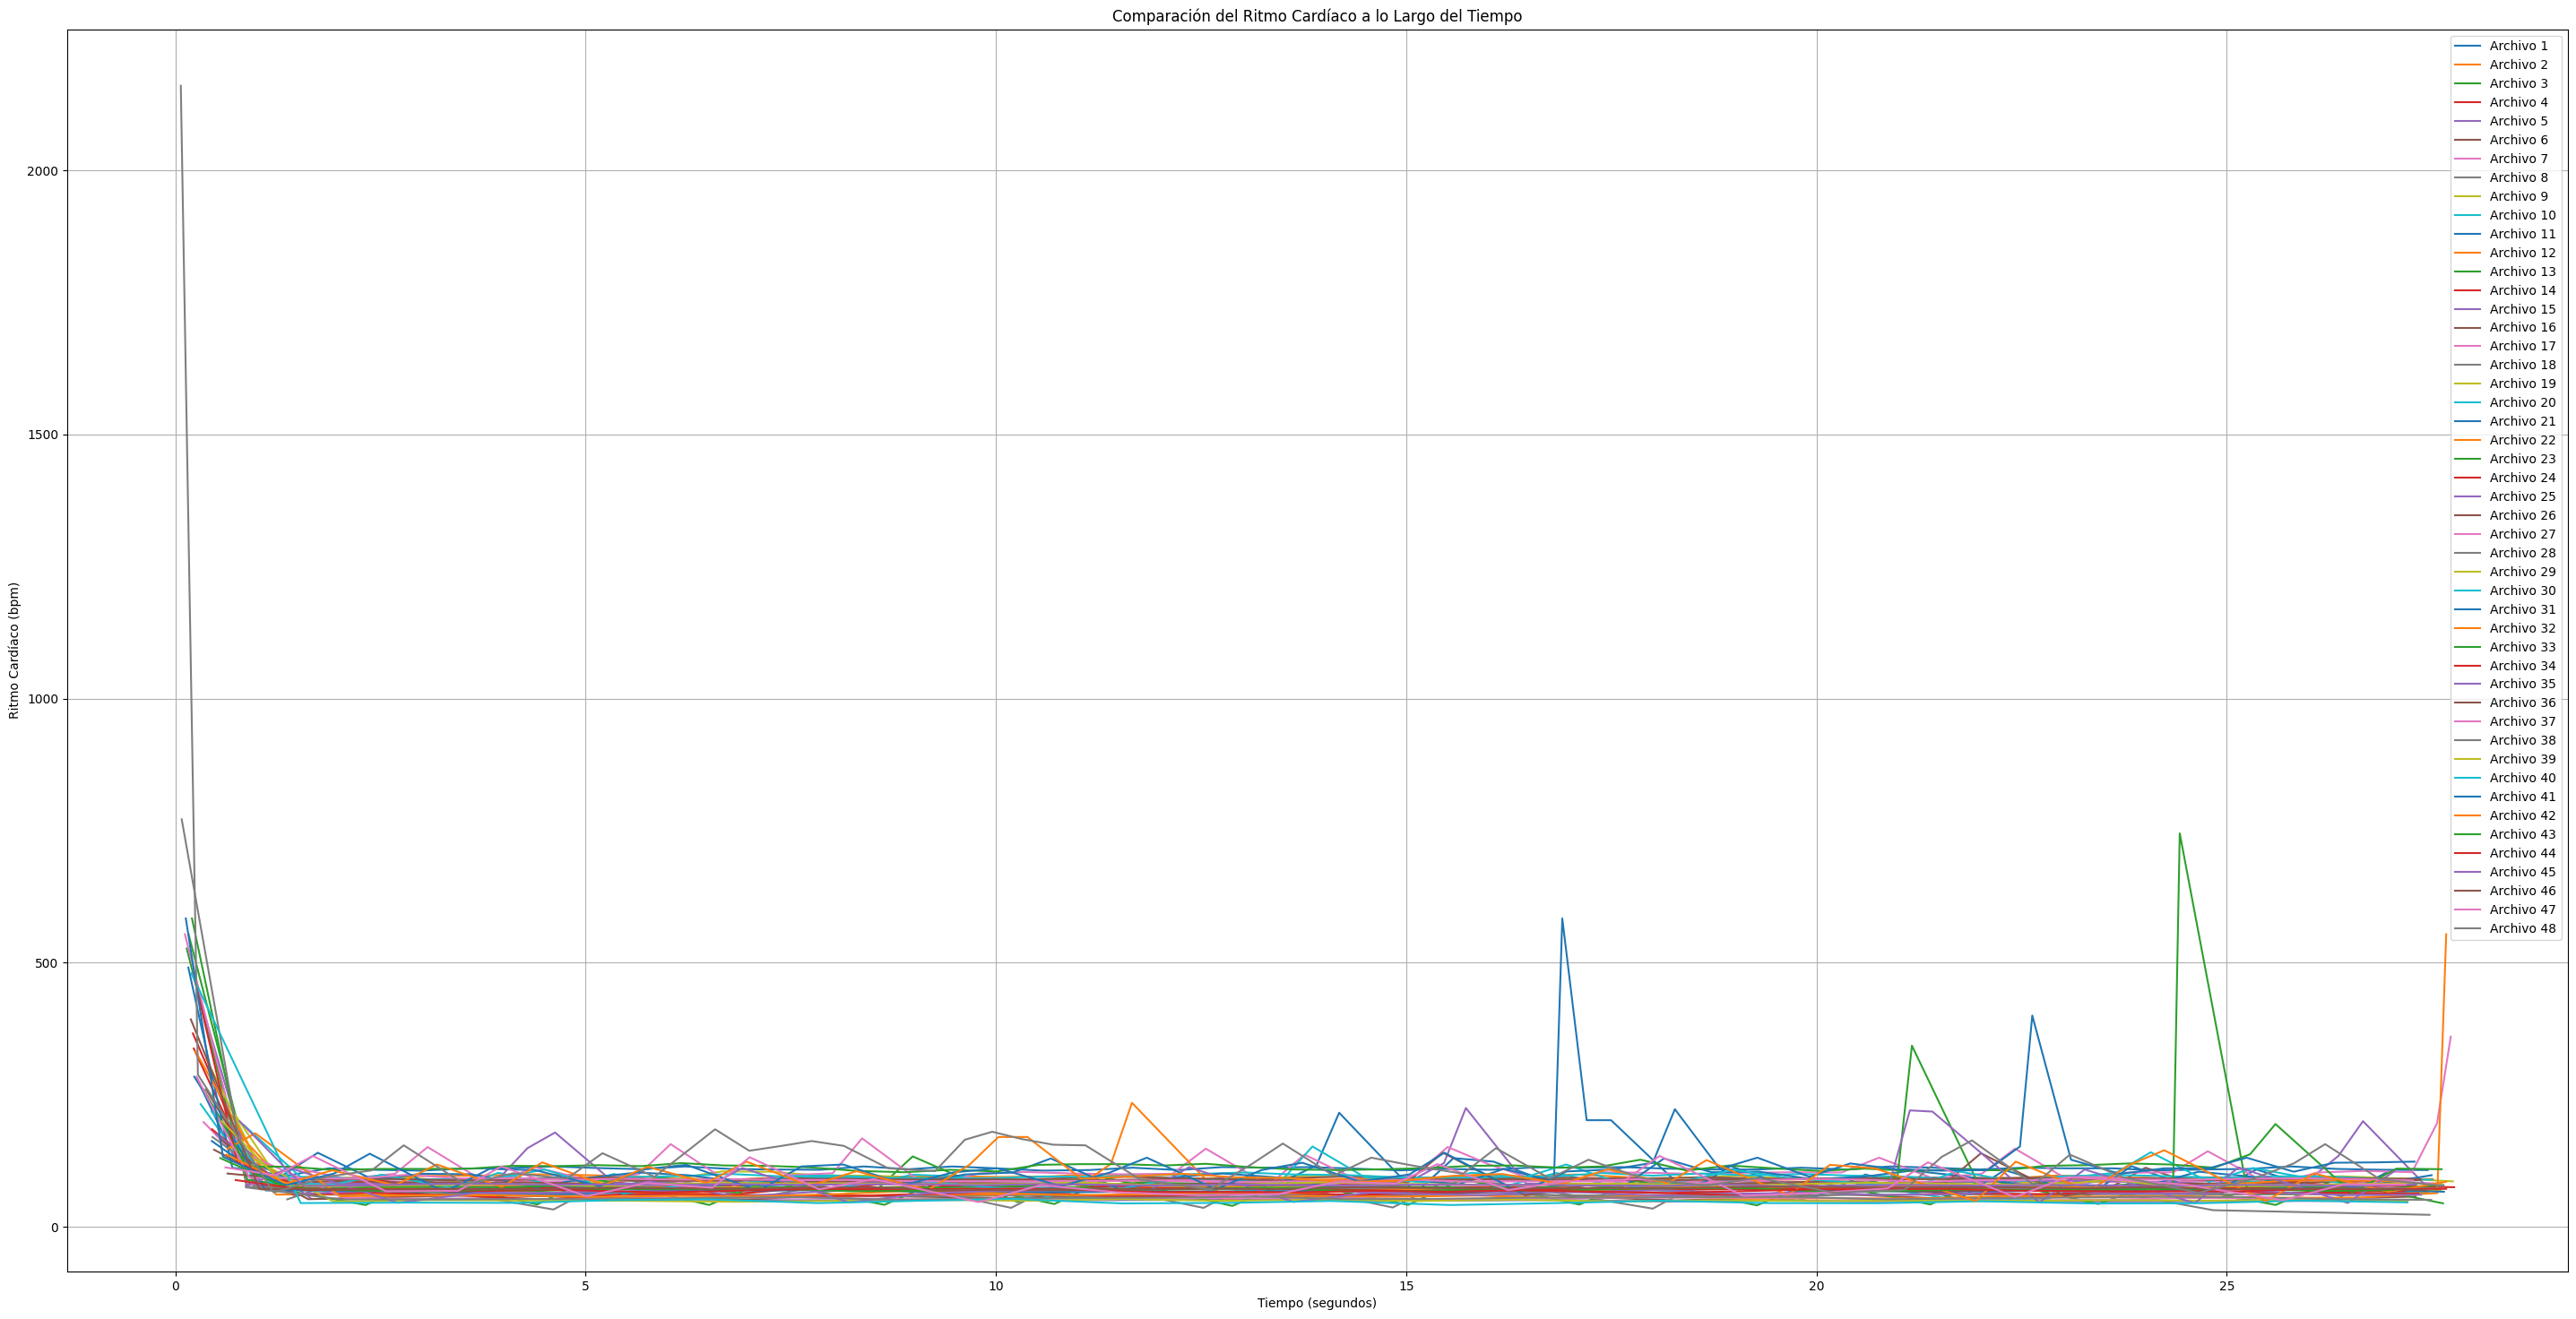

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(36, 18))
for i, dataframe in enumerate(heart_rate_values):
    plt.plot(dataframe['time'], dataframe['hr'], label=f'Archivo {i + 1}')

plt.xlabel("Tiempo (segundos)")
plt.ylabel("Ritmo Cardíaco (bpm)")
plt.title("Comparación del Ritmo Cardíaco a lo Largo del Tiempo")
plt.legend()
plt.grid()
plt.show()